In [1]:
# imported libs
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.linear_model import LinearRegression
from math import sqrt

# custom lib

import wrangle
import prepare

# Exercises

## Do you work for this exercise in either a jupyter notebook named evaluate within your regression-exercises repository. By the end of this exercise you will also create a python script named evaluate, so the overall deliverables for this exercise are the python script and jupyter notebook both with the name evaluate within your regression-exercises repo.

1. Load your zillow dataset.

In [2]:
# loaded data and spltted
df = wrangle.wrangle_zillow()
train, val, test = wrangle.train_val_test(df)
train.head()

,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,fips
1001601,3,2.0,1452,241012,1980,2974.81,6037
611989,3,2.0,1262,235630,1953,3029.22,6037
658616,3,1.0,1447,435123,1947,5226.67,6037
835115,3,2.0,1403,268770,1965,2849.62,6111
242295,3,2.0,1456,365000,1961,4582.48,6037


2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calculatedfinishedsqft.

- tax_value
- area

In [3]:
# set model varible to log ref.
model = LinearRegression()

In [4]:
# split into subsets for train and val
X_train = train[['area']]
y_train = train.tax_value

X_val = val[['area']]
y_val = val.tax_value

In [5]:
# using median
y_train.median()

328010.5

In [6]:
# created a DF to work with
preds = pd.DataFrame({'y_actual' : y_train,
              'y_baseline': y_train.median()})

preds.head()

,y_actual,y_baseline
1001601,241012,328010.5
611989,235630,328010.5
658616,435123,328010.5
835115,268770,328010.5
242295,365000,328010.5


In [7]:
# calculating residuals
preds['y_baseline_resids'] = preds['y_baseline'] - preds['y_actual']
preds.head()

,y_actual,y_baseline,y_baseline_resids
1001601,241012,328010.5,86998.5
611989,235630,328010.5,92380.5
658616,435123,328010.5,-107112.5
835115,268770,328010.5,59240.5
242295,365000,328010.5,-36989.5


Here is some sample code to get you started:  
Modify and add to the code above as necessary for it to work with the zillow dataset.

In [8]:
# assuming X and y are already defined
model = LinearRegression().fit(X_train, y_train)

model.fit(X_train, y_train)

preds['y_hat'] = model.predict(X_train)

In [9]:
model

LinearRegression()

In [10]:
# y-hat resids calc
preds['y_hat_resids'] = preds['y_hat'] - preds['y_actual']

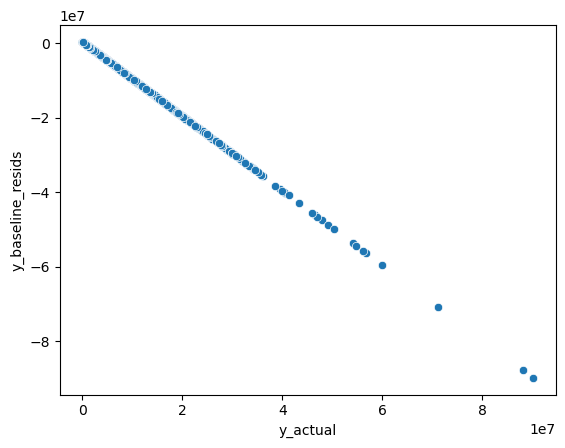

In [11]:
# baseline 
sns.scatterplot(data=preds, x='y_actual', y='y_baseline_resids')
plt.show()

3. Plot the residuals for the linear regression model that you made.

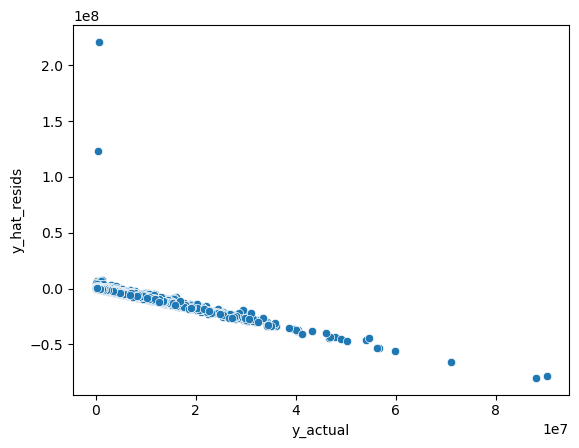

In [12]:
# calculated and ploted residulas for model
sns.scatterplot(data=preds, x='y_actual', y='y_hat_resids')
plt.show()

4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your **MODEL**.

- sum of squared errors

In [13]:
# calculated sse
preds['y_hat_resids_sq'] = preds['y_hat_resids'] ** 2
preds.head()

,y_actual,y_baseline,y_baseline_resids,y_hat,y_hat_resids,y_hat_resids_sq
1001601,241012,328010.5,86998.5,364907.314578,123895.314578,1.535005e+10
611989,235630,328010.5,92380.5,320717.233800,85087.233800,7.239837e+09
658616,435123,328010.5,-107112.5,363744.417715,-71378.582285,5.094902e+09
835115,268770,328010.5,59240.5,353510.925325,84740.925325,7.181024e+09
242295,365000,328010.5,-36989.5,365837.632068,837.632068,7.016275e+05


In [14]:
# sse sum for model
sse_model = preds.y_hat_resids_sq.sum()
sse_model

5.523021635076628e+17

- explained of squared errors

In [15]:
# calculated ess for model
preds['y_hat_minus_mean'] = preds['y_hat'] - preds['y_actual'].mean()
preds.head()

,y_actual,y_baseline,y_baseline_resids,y_hat,y_hat_resids,y_hat_resids_sq,y_hat_minus_mean
1001601,241012,328010.5,86998.5,364907.314578,123895.314578,1.535005e+10,-95593.005277
611989,235630,328010.5,92380.5,320717.233800,85087.233800,7.239837e+09,-139783.086055
658616,435123,328010.5,-107112.5,363744.417715,-71378.582285,5.094902e+09,-96755.902139
835115,268770,328010.5,59240.5,353510.925325,84740.925325,7.181024e+09,-106989.394530
242295,365000,328010.5,-36989.5,365837.632068,837.632068,7.016275e+05,-94662.687787


In [16]:
# ess for model
ess_model = sum(preds['y_hat_minus_mean'] ** 2)
ess_model

1.400345626838779e+17

- total sum of squared errors

In [17]:
# total sum of squares for model
tss_model = sse_model + ess_model
tss_model

6.923367261915407e+17

- mean squared error

In [18]:
# calculating mean squared error for model
mse_model = sse_model/len(preds)
mse_model

368652673210.4515

- root mean squared error

In [19]:
# calculating square root of mean squared error
rmse_model = sqrt(mse_model)
rmse_model

607167.7471757302

* model plotted:

In [20]:
lm = LinearRegression()

lm.fit(X_train, y_train)

preds['y_hat'] = lm.predict(X_train)

In [21]:
rmse_model = sqrt(mean_squared_error(preds['y_actual'], preds['y_hat']))
rmse_model

607167.7471757302

In [22]:
print(f'RMSE of our model : {round(rmse_model)}')

RMSE of our model : 607168


5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the **BASELINE MODEL** (i.e. a model that always predicts the average taxvaluedollarcnt amount).

- sum of squared errors

In [30]:
# sse calculated for baseline
preds['y_baseline_resids_sq'] = preds['y_baseline_resids'] ** 2
preds.head()

,y_actual,y_baseline,y_baseline_resids,y_hat,y_hat_resids,y_hat_resids_sq,y_hat_minus_mean,y_baseline_resids_sq,y_baseline_minus_mean
1001601,241012,328010.5,86998.5,364907.314578,123895.314578,1.535005e+10,-95593.005277,7.568739e+09,-132489.819855
611989,235630,328010.5,92380.5,320717.233800,85087.233800,7.239837e+09,-139783.086055,8.534157e+09,-132489.819855
658616,435123,328010.5,-107112.5,363744.417715,-71378.582285,5.094902e+09,-96755.902139,1.147309e+10,-132489.819855
835115,268770,328010.5,59240.5,353510.925325,84740.925325,7.181024e+09,-106989.394530,3.509437e+09,-132489.819855
242295,365000,328010.5,-36989.5,365837.632068,837.632068,7.016275e+05,-94662.687787,1.368223e+09,-132489.819855


In [31]:
sse_baseline = preds.y_baseline_resids_sq.sum()
sse_baseline

7.186348264170656e+17

- mean squared error

In [32]:
mse_baseline = sse_baseline/len(preds)
mse_baseline

479677008936.9826

- root mean squared error

In [33]:
rmse_baseline = sqrt(mse_baseline)
rmse_baseline

692587.1850799599

In [34]:
print(f'RMSE of our baseline : {round(rmse_baseline)}')

RMSE of our baseline : 692587


6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [38]:
# python code to compare
if sse_model < sse_baseline:
    print("Your model performs better than the baseline model.")

elif sse_model > sse_baseline:
    print("Your model performs worse than the baseline model.")

else:
    print("Your model performs equally to the baseline model.")

Your model performs better than the baseline model.


7. What is the amount of variance explained in your model?

In [39]:
r2_score(preds['y_actual'], preds['y_hat'])

0.20226366359925063

8. Is your model better than the baseline model?

Yes

- "Your model performs better than the baseline model."

9. Create a file named evaluate.py that contains the following functions.

* plot_residuals(y, yhat): creates a residual plot
* regression_errors(y, yhat): returns the following values:
    * sum of squared errors (SSE)
    * explained sum of squares (ESS)
    * total sum of squares (TSS)
    * mean squared error (MSE)
    * root mean squared error (RMSE)
* baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
* better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

In [ ]:
# created residual plot
def plot_residual(y, y_hat):

# returns values
def regression_erros(y, yhat):
    # SSE
    # ESS
    # TSS
    # MSE
    # RMSE

# computes the SSE, MSE, and RMSE for the baseline model
def baseline_mean_errors(y):


# returns true if your model performs better than the baseline, otherwise false
def better_than_baseline(y, y_hat):
    

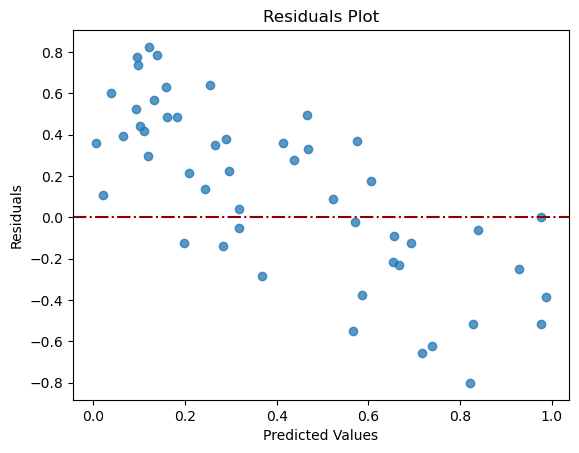

SSE: 9.431402701367052

ESS: 5.030077186436414

TSS: 3.7064339165635904

MSE: 0.18862805402734104

RMSE: 0.4343133132052724

-------------------------------

Baseline SSE: 3.7064339165635904

Baseline MSE: 0.0741286783312718

Baseline RMSE: 0.27226582292177587

_______________________________

Is the model better than the baseline? False


In [57]:
#----------------------------- PLOT RESDIDS FUNCTION ----------------------------

# created residual plot
def plot_residuals(y, yhat):
    """
    a residual plot.

    Parameters:
    - y: Actual values
    - yhat: Predicted values
    """
    residuals = y - yhat
    plt.scatter(yhat, residuals, alpha=0.75)
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title("Residuals Plot")
    plt.axhline(0, color='darkred', linestyle='dashdot')
    plt.show()

#----------------------------- REG ERR FUNCTION ----------------------------

# returns values
def regression_errors(y, yhat):
    """
    Returns various regression error metrics.

    Parameters:
    - y: Actual values
    - yhat: Predicted values

    Returns:
    - SSE: Sum of Squared Errors
    - ESS: Explained Sum of Squares
    - TSS: Total Sum of Squares
    - MSE: Mean Squared Error
    - RMSE: Root Mean Squared Error
    """
    SSE = np.sum((y - yhat) ** 2)
    ESS = np.sum((yhat - np.mean(y)) ** 2)
    TSS = np.sum((y - np.mean(y)) ** 2)
    MSE = SSE / len(y)
    RMSE = np.sqrt(MSE)
    
    return SSE, ESS, TSS, MSE, RMSE


#---------------------- BASELINE MEAN ERR FUNCTION -------------------

# computes the SSE, MSE, and RMSE for the baseline model
def baseline_mean_errors(y):
    """
    Computes the SSE, MSE, and RMSE for the baseline model.

    Parameters:
    - y: Actual values

    Returns:
    - SSE: Sum of Squared Errors for the baseline
    - MSE: Mean Squared Error for the baseline
    - RMSE: Root Mean Squared Error for the baseline
    """
    y_baseline = np.mean(y)
    SSE_baseline = np.sum((y - y_baseline) ** 2)
    MSE_baseline = SSE_baseline / len(y)
    RMSE_baseline = np.sqrt(MSE_baseline)
    
    return SSE_baseline, MSE_baseline, RMSE_baseline


#---------------------- BASELINE MEAN ERR FUNCTION -------------------

# returns true if your model performs better than the baseline, otherwise false
def better_than_baseline(y, yhat):
    """
    Returns True if the model performs better than the baseline, otherwise False.

    Parameters:
    - y: Actual values
    - yhat: Predicted values

    Returns:
    - True if model's RMSE < baseline's RMSE, else False
    """
    _, _, _, _, RMSE = regression_errors(y, yhat)
    _, _, RMSE_baseline = baseline_mean_errors(y)
    
    return RMSE < RMSE_baseline

# Example usage:

if __name__ == "__main__":
    
    # Generate some example data
    np.random.seed(0)
    y = np.random.rand(50)
    yhat = np.random.rand(50)

    # Example usage of the functions
    plot_residuals(y, yhat)
    
    SSE, ESS, TSS, MSE, RMSE = regression_errors(y, yhat)
    
    print(f"SSE: {SSE}\n")
    
    print(f"ESS: {ESS}\n")
    
    print(f"TSS: {TSS}\n")
    
    print(f"MSE: {MSE}\n")
    
    print(f"RMSE: {RMSE}\n")

    print(f"-------------------------------\n")
    
    SSE_baseline, MSE_baseline, RMSE_baseline = baseline_mean_errors(y)
    
    print(f"Baseline SSE: {SSE_baseline}\n")
    
    print(f"Baseline MSE: {MSE_baseline}\n")
    
    print(f"Baseline RMSE: {RMSE_baseline}\n")

    print(f"_______________________________\n")
    
    print(f"Is the model better than the baseline? {better_than_baseline(y, yhat)}")

# Bonus Exercises

1. Load the tips dataset from either pydataset or seaborn. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

2. Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.